<a href="https://colab.research.google.com/github/female-coders-linz/workshops/blob/master/weather_forecast/Weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather data from an API

The goal of this notebook is to show how you can fetch data from an API, how to extract relevant data and how to visualize them with matplotlib.


This notebook fetches weather data from an API called [*Open Weather Map*](https://rapidapi.com/community/api/open-weather-map/endpoints). For this you need an API key (free).

The current weather and the weather forecast is fetched. Parts of the results are visualised.
In the extra exercise also past weather data of a day in the past is visualised.


Feel free to change any plots, metrics - there is a various of options to plot, e.g. you could plot also the wind speed.


## Get current weather from API




In [ ]:
import requests

from pprint import pprint

In [ ]:
api_key = input('Enter rapidapi key: ')

In [ ]:
# Volkspark
my_lat = 48.294849
my_lon = 14.292024

headers = {
    'x-rapidapi-host': "community-open-weather-map.p.rapidapi.com",
    'x-rapidapi-key': api_key
    }

In [ ]:
url = "https://community-open-weather-map.p.rapidapi.com/weather"

querystring = {
    "lat": my_lat,
    "lon": my_lon, 
    "units":"metric", 
    "lang":"de"
}  #, "q":"Linz"

response = requests.request("GET", url, headers=headers, params=querystring).json()

print(response)
pprint(response['weather'][0]['description'])

{'coord': {'lon': 14.29, 'lat': 48.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'Ein paar Wolken', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 5.05, 'feels_like': 3.03, 'temp_min': 3.89, 'temp_max': 6, 'pressure': 1023, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1603049894, 'sys': {'type': 1, 'id': 6874, 'country': 'AT', 'sunrise': 1602998829, 'sunset': 1603037303}, 'timezone': 7200, 'id': 3321859, 'name': 'Froschberg', 'cod': 200}
'Ein paar Wolken'


## Get Weather forecast

In [ ]:
# from requests import get
# import json

def get_forecast(n_days=10):
  url = "https://community-open-weather-map.p.rapidapi.com/forecast/daily" 

  querystring = {
      "lat": my_lat,
      "lon": my_lon,
      "cnt": n_days, 
      "units": "metric"
  }

  return requests.request("GET", url, headers=headers, params=querystring).json()


In [ ]:
n_days = 16

weather_forecast = get_forecast(n_days=16)

city = weather_forecast['city']['name']
print(city)

weather_list = weather_forecast['list']

# pprint(weather_list[1])

Froschberg


In [ ]:
import pandas as pd

from datetime import datetime


temperatures= list()

for weather in weather_list:
  day_temp = weather['temp']['day']
  min_temp = weather['temp']['min']
  max_temp = weather['temp']['max']
  humidity = weather['humidity']
  dt = datetime.utcfromtimestamp(weather['dt'])

  temperatures.append({
                'dt': dt,                
                'day_temp': day_temp,
                'min_temp': min_temp,
                'max_temp': max_temp,
                'humidity': humidity

      }
  )

temperature_df = pd.DataFrame(temperatures)
temperature_df.head(5)

,dt,day_temp,min_temp,max_temp,humidity
0,2020-10-18 10:00:00,8.89,4.90,10.94,79
1,2020-10-19 10:00:00,8.58,4.65,11.96,73
2,2020-10-20 10:00:00,9.31,3.17,13.72,69
3,2020-10-21 10:00:00,11.89,5.27,15.63,62
4,2020-10-22 10:00:00,14.85,7.49,18.84,62


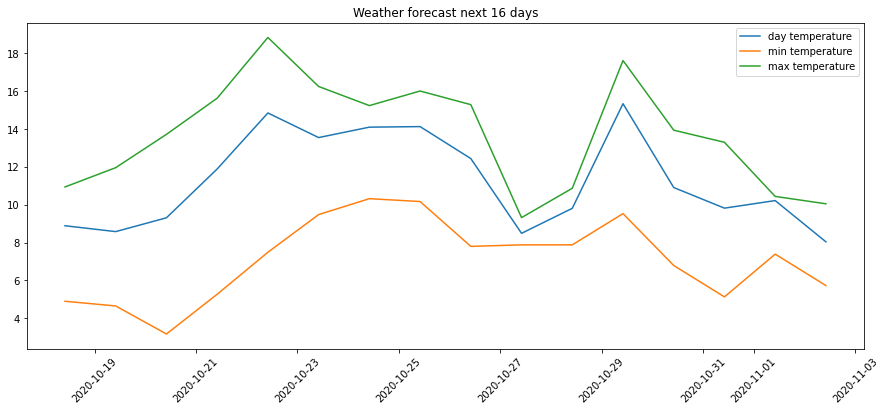

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 6))
plt.plot(temperature_df['dt'], temperature_df['day_temp'], label='day temperature')
plt.plot(temperature_df['dt'], temperature_df['min_temp'], label='min temperature')
plt.plot(temperature_df['dt'], temperature_df['max_temp'], label='max temperature')
# plt.plot(temperature_df['dt'], temperature_df['humidity'], label='humidity')


plt.title(f'Weather forecast next {n_days} days')
plt.xticks(rotation=45) 
plt.legend()
plt.show()


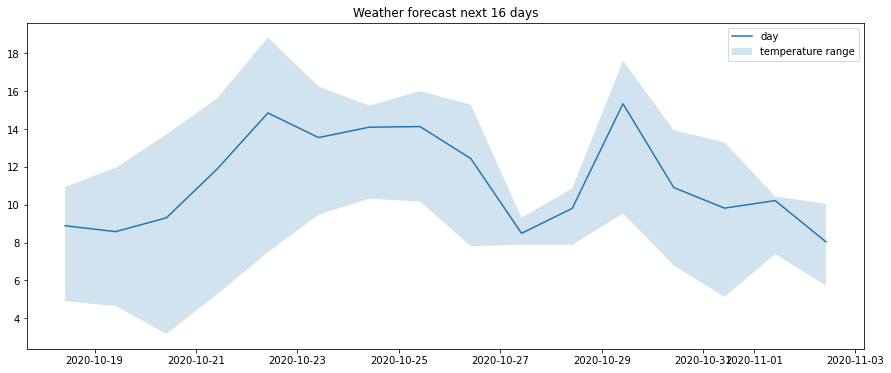

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(temperature_df['dt'], temperature_df['day_temp'], label='day')

plt.fill_between(x=temperature_df['dt'], y1=temperature_df['min_temp'], 
                 y2=temperature_df['max_temp'], label='temperature range', 
                 alpha=0.2)

plt.title(f'Weather forecast next {n_days} days')
plt.legend()
plt.show()

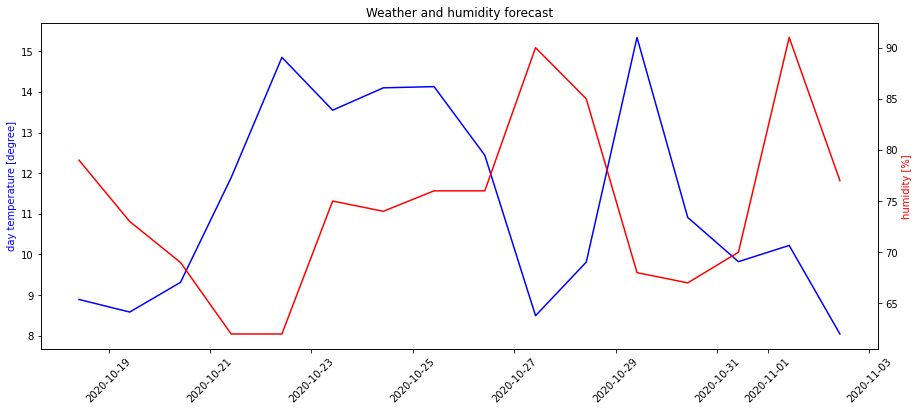

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(temperature_df['dt'], temperature_df['day_temp'], color='blue')
plt.xticks(rotation=45)

ax2 = ax1.twinx() 
ax2.plot(temperature_df['dt'], temperature_df['humidity'], color='red')

ax1.set_ylabel('day temperature [degree]', color='blue')
ax2.set_ylabel('humidity [%]', color='red')  
 
plt.title('Weather and humidity forecast')
plt.show()


## Extra: Get historical weather data

In [ ]:
from datetime import timedelta

url = "https://community-open-weather-map.p.rapidapi.com/onecall/timemachine"

n_days = 2
n_days_ago = (datetime.now() - timedelta(days=n_days)).timestamp()

querystring = {
    "lat":my_lat,
    "lon":my_lon,
    "dt": int(n_days_ago),
    "units": "metric"
}

response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [ ]:
history_temps = []

for entry in response['hourly']:
  history_temps.append({
      'dt': datetime.utcfromtimestamp(entry['dt']),
      'temp': entry['temp']
  })

history_temps_df = pd.DataFrame(history_temps)
history_temps_df.head(5)

,dt,temp
0,2020-10-16 00:00:00,6.32
1,2020-10-16 01:00:00,6.26
2,2020-10-16 02:00:00,6.23
3,2020-10-16 03:00:00,6.26
4,2020-10-16 04:00:00,5.97


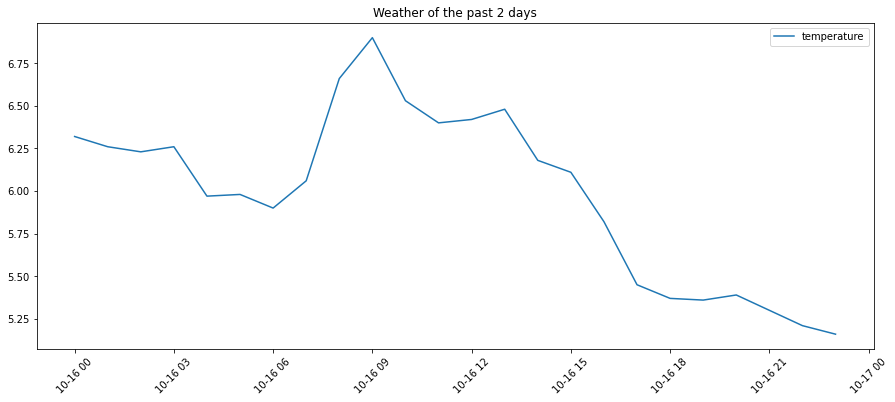

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 6))
plt.plot(history_temps_df['dt'], history_temps_df['temp'], label='temperature')


plt.title(f'Weather of the past {n_days} days')
plt.xticks(rotation=45) 
plt.legend()
plt.show()